# Chem-I-Calc Basics

## Instruments
The instrument object is half of the CRLB calculation and provides the instrumental wavelength coverage, sampling, and resolution of the spectrum as well as the Signal/Noise for the observation.

### Pre-Defined Instruments
We have included the following spectrographs of interest which you can initialize as follows. <br>
(Requests for other standard spectraphs are welcome!)

In [38]:
import numpy as np
from copy import copy
import matplotlib.pyplot as plt

from chemicalc import instruments as inst
from chemicalc import s2n

allInst = inst.AllInstruments()

for name in allInst.spectrographs:
    spectrograph = allInst.spectrographs[name]
    spectrograph.summary()
    print('')

DEIMOS 1200G
6500 < lambda (A) < 9000
R ~ 6500
Sampling ~ 4 pix/FWHM

DEIMOS 900ZD
4000 < lambda (A) < 7200
R ~ 2550
Sampling ~ 5 pix/FWHM

DEIMOS 1200B
4000 < lambda (A) < 6400
R ~ 4000
Sampling ~ 4 pix/FWHM

LRIS 600/4000 (b)
3900 < lambda (A) < 5500
R ~ 1800
Sampling ~ 4 pix/FWHM

LRIS 1200/7500 (r)
7700 < lambda (A) < 9000
R ~ 4000
Sampling ~ 5 pix/FWHM

HIRESr 1.0"
3900 < lambda (A) < 8350
R ~ 34000
Sampling ~ 3 pix/FWHM

HIRESr 0.8"
3900 < lambda (A) < 8350
R ~ 49000
Sampling ~ 3 pix/FWHM

MIKE 1" (r)
4900 < lambda (A) < 10000
R ~ 22000
Sampling ~ 3 pix/FWHM

MIKE 1" (b)
3350 < lambda (A) < 5000
R ~ 28000
Sampling ~ 3 pix/FWHM

M2FS MedRes
5132 < lambda (A) < 5186
R ~ 18000
Sampling ~ 3 pix/FWHM

Hectochelle
3800 < lambda (A) < 9000
R ~ 32000
Sampling ~ 3 pix/FWHM

Hectochelle
3650 < lambda (A) < 9200
R ~ 1000
Sampling ~ 3 pix/FWHM

MUSE
4650 < lambda (A) < 9300
R ~ 3000
Sampling ~ 3 pix/FWHM

NIRSpec G140M/F070LP
7000 < lambda (A) < 12700
R ~ 1000
Sampling ~ 3 pix/FWHM

NIRSpec 

### Custom Instruments

You can easily create your own instrumental configuration by providing the following information:

- Instrument Name
- Resolving Power ($\Delta\lambda/\lambda$)
- Wavelength Sampling (pix / FWHM)
- Starting Wavelength (Angstrom) (> 3000 A)
- Ending Wavelength (Angstrom) (< 18000 A)

In [25]:
custom_spectrographs = inst.MiscInstrument('My Instrument', res=4000, samp=3, start=8000, end=9000)
custom_spectrographs.summary()

My Instrument
8000 < lambda (A) < 9000
R ~ 4000
Sampling ~ 3 pix/FWHM


If you have a specific wavelength grid you'd like to use, simply assign it to an already initialized instrument. <br>
NOTE: This does not change the instrument summary from what it was initialized as.

In [32]:
custom_spectrographs.wave = np.linspace(5000,6000,1001)
print(custom_spectrographs.wave)

[5000. 5001. 5002. ... 5998. 5999. 6000.]


### Set Signal/Noise

Before you can calculate the CRLBs for an instrument, you need to set the S/N for your observations. This can be a constant value, or an array that can be interpolated onto your wavelength. There is also funcitonality to query the WMKO ETC for DEIMOS, LRIS, and HIRES (e.g., http://etc.ucolick.org/web_s2n/deimos) and functionality to query other online exposure time calculators is in the works.

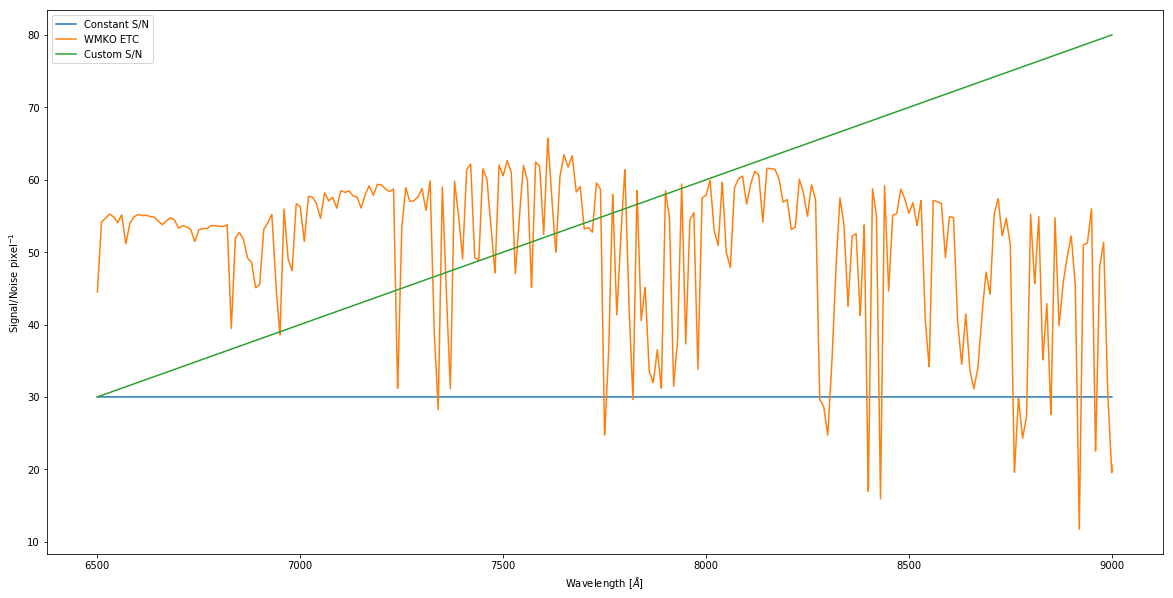

In [60]:
d1200g_default = allInst.spectrographs['DEIMOS 1200G']
d1200g_const = copy(d1200g_default)
d1200g_query = copy(d1200g_default)
d1200g_interp = copy(d1200g_default)

d1200g_const.set_snr(30)

one_hour = 3600  # s
d1200G_snr_query_1h = s2n.Sig2NoiseDEIMOS(grating='1200G', exptime=1*one_hour, mag=19, magtype='Vega',
                                          band='Buser_V.dat', template='K5V_pickles_36.fits',
                                          cwave='7000', slitwidth='0.75', binning='1x1',
                                          airmass=1.1, seeing=0.75, redshift=0)
d1200g_query.set_snr(d1200G_snr_query_1h)

snr_wave = np.linspace(6000, 9000, 30)
snr_value = np.linspace(20, 80, 30)
snr_array = np.array([snr_wave, snr_value])
d1200g_interp.set_snr(snr_array)


plt.figure(figsize=(20,10))
plt.plot(d1200g_const.wave, d1200g_const.snr, label='Constant S/N')
plt.plot(d1200g_query.wave, d1200g_query.snr, label='WMKO ETC')
plt.plot(d1200g_interp.wave, d1200g_interp.snr, label='Custom S/N')
plt.xlabel(r'Wavelength $[\AA]$')
plt.ylabel(r'Signal/Noise pixel$^{-1}$')
plt.legend()
plt.show()

## Reference Stars

The spectrum and labels of the star in question is the other half of the equation when it comes to calculating the CRLB. You can check which stars are currently included as follows. More will be included eventually. And in future versions, fucntionality to import user spectra / gradients will be included.

In [64]:
from chemicalc import reference_spectra as ref
import matplotlib.pyplot as plt
print(ref.reference_stars)

['RGB_m1.0', 'RGB_m1.5', 'RGB_m2.0']


The labels of the reference star can be be found as follows

In [67]:
RGB = ref.ReferenceSpectra(reference='RGB_m1.5', res='high')
print(RGB.labels.iloc[:,0])

Teff       4.750000e+03
logg       1.800000e+00
v_micro    1.900000e+00
Li         0.000000e+00
Be         0.000000e+00
B          0.000000e+00
C          4.440892e-16
N          0.000000e+00
O          4.440892e-16
F          0.000000e+00
Ne         0.000000e+00
Na         0.000000e+00
Mg         0.000000e+00
Al         0.000000e+00
Si         0.000000e+00
P          8.881784e-16
S          0.000000e+00
Cl         8.881784e-16
Ar         0.000000e+00
K          0.000000e+00
Ca         0.000000e+00
Sc         0.000000e+00
Ti         0.000000e+00
V          0.000000e+00
Cr         0.000000e+00
Mn         8.881784e-16
Fe        -1.500000e+00
Co        -8.881784e-16
Ni         0.000000e+00
Cu         0.000000e+00
               ...     
Yb         0.000000e+00
Lu         0.000000e+00
Hf         0.000000e+00
Ta         0.000000e+00
W          0.000000e+00
Re         0.000000e+00
Os         0.000000e+00
Ir         0.000000e+00
Pt         0.000000e+00
Au         0.000000e+00
Hg         0.000

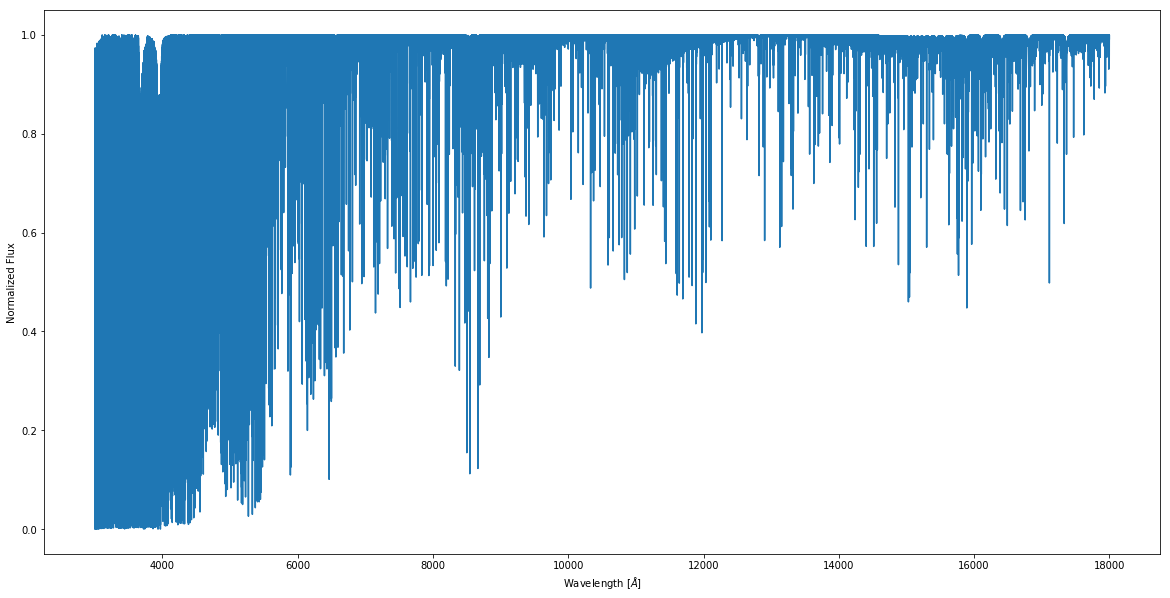

In [71]:
plt.figure(figsize=(20,10))
plt.plot(RGB.wavelength['init'], RGB.spectra['init'][0])
plt.xlabel(r'Wavelength [$\AA$]')
plt.ylabel('Normalized Flux')
plt.show()

## Calculating CRLBs

Now we have all the tools to calculate the CRLBs!

In [89]:
import pandas as pd
import plotly.graph_objs as go

from chemicalc import instruments as inst
from chemicalc import s2n
from chemicalc import reference_spectra as ref
from chemicalc.utils import calc_crlb, sort_crlb
from chemicalc.plot import plotly_crlb, overplot_crlb, multiplot_crlb

# Initialize Preset Instrument
allInst = inst.AllInstruments()
d1200g = allInst.spectrographs['DEIMOS 1200G']

# Initialize Reference Spectra
RGB = ref.ReferenceSpectra(reference='RGB_m1.5', res='high')

# Convolve Reference Spectra to Insturment Resolution
RGB.convolve(d1200g)

# Calculate Gradient Spectra
RGB.calc_gradient(d1200g.name, symmetric=True, ref_included=True, v_micro_scaling=1)

# Set SNR
one_hour = 3600  # s
d1200G_snr_query_1h = s2n.Sig2NoiseDEIMOS(grating='1200G', exptime=1*one_hour, mag=19, magtype='Vega',
                                          band='Buser_V.dat', template='K5V_pickles_36.fits',
                                          cwave='7000', slitwidth='0.75', binning='1x1',
                                          airmass=1.1, seeing=0.75, redshift=0)
d1200g.set_snr(d1200G_snr_query_1h)

# Calculate CRLB
CRLB = pd.DataFrame(index=RGB.labels.index)
CRLB[d1200g.name] = calc_crlb(RGB, d1200g)
CRLB = sort_crlb(CRLB, cutoff=0.3, sort_by='default')

# Plot CRLB
CRLB.index = [r'$T_{eff}$ (100 K)', r'$\log(g)$', r'$v_{micro}$ (km/s)'] + list(CRLB.index[3:])
plotly_crlb(CRLB)